In [147]:
import pandas as pd

df = pd.read_excel('premium_rest.xlsx')

df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [148]:
df['Genetical_Risk']=0

In [149]:
df.shape

(29904, 14)

In [150]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [151]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


In [152]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [153]:
df.dropna(inplace=True)

In [154]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [155]:
df.duplicated().sum()

np.int64(0)

In [156]:
# df.drop_duplicates(inplace=True)

In [157]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


In [158]:
df[df.number_of_dependants < 0].shape

(50, 14)

In [159]:
df[df.number_of_dependants < 0]['number_of_dependants'].unique()

array([-1, -3])

In [160]:
df['number_of_dependants'] = abs(df['number_of_dependants'])

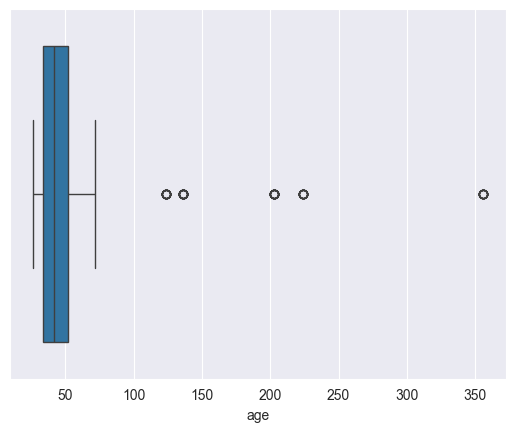

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['age'])
plt.show()

In [162]:
df.select_dtypes(['float64', 'int64']).columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

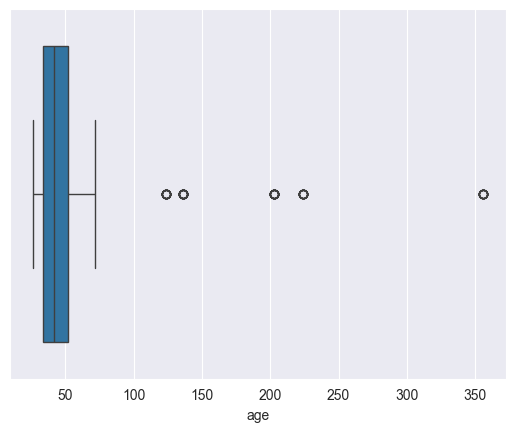

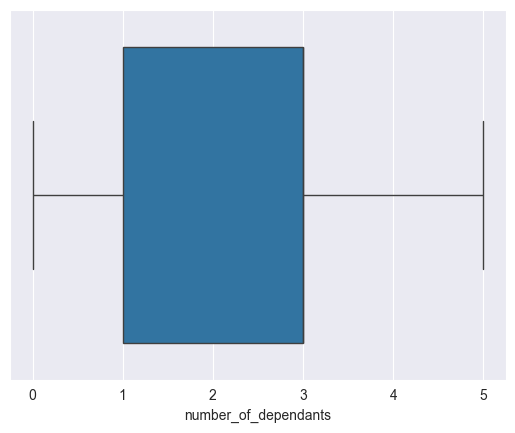

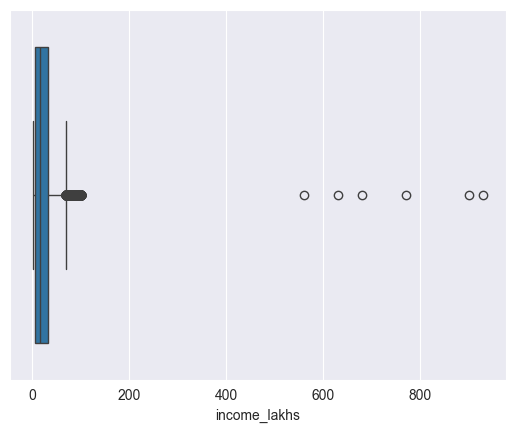

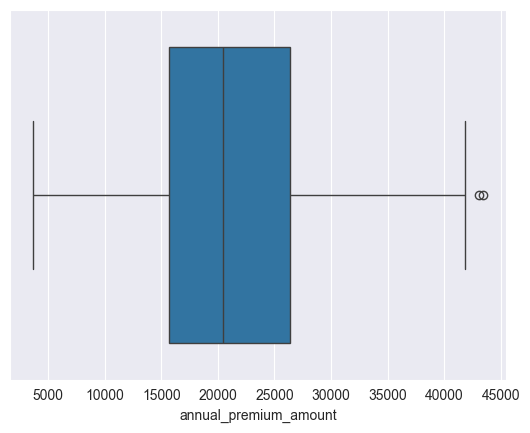

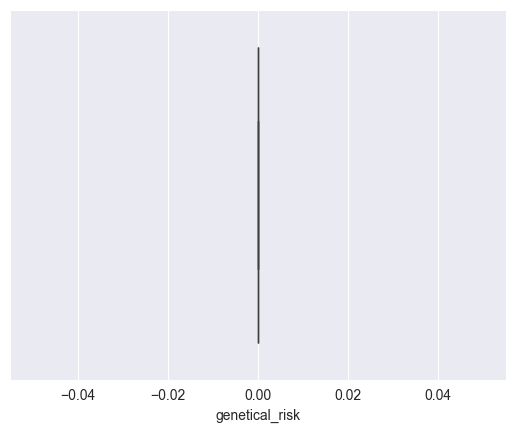

In [163]:
for col in df.select_dtypes(['float64', 'int64']).columns:
    sns.boxplot(x=df[col])
    plt.show()

In [164]:
df[df.age > 100].shape

(58, 14)

In [165]:
df[df.age > 100]['age'].unique()

array([224, 124, 136, 203, 356])

In [166]:
df1 = df[df.age <= 100].copy()

In [167]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29828.000000,29828.000000,29828.000000,29828.000000,29828.0
mean,43.095380,2.387790,23.371530,20901.900563,0.0
std,11.041991,1.420641,24.751262,6928.457636,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15706.000000,0.0
50%,42.000000,3.000000,17.000000,20496.000000,0.0
75%,52.000000,3.000000,32.000000,26361.000000,0.0
max,72.000000,5.000000,930.000000,43471.000000,0.0


<Axes: xlabel='income_lakhs', ylabel='Count'>

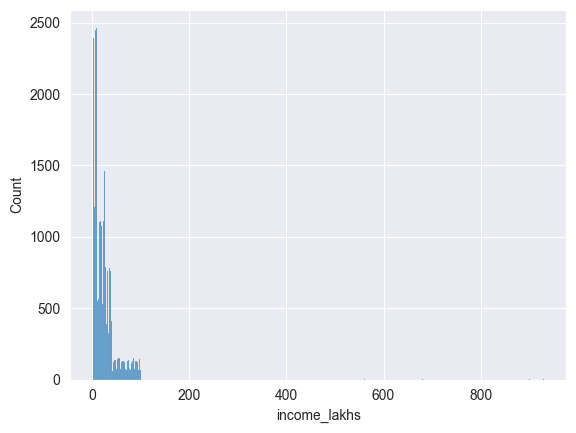

In [168]:
sns.histplot(df1['income_lakhs'])

In [169]:
def get_iqr_bounds(col):
    q1, q3 = col.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

In [170]:
get_iqr_bounds(df1['income_lakhs'])

(-30.5, 69.5)

In [171]:
df1.income_lakhs.quantile(0.999)

np.float64(100.0)

In [172]:
df2 = df1[df1.income_lakhs <= df1.income_lakhs.quantile(0.999)]

In [173]:
df2.shape

(29822, 14)

In [174]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.0
mean,43.094896,2.387734,23.226343,20900.689223,0.0
std,11.042430,1.420644,22.455408,6928.192115,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15705.250000,0.0
50%,42.000000,3.000000,17.000000,20495.500000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,72.000000,5.000000,100.000000,43471.000000,0.0


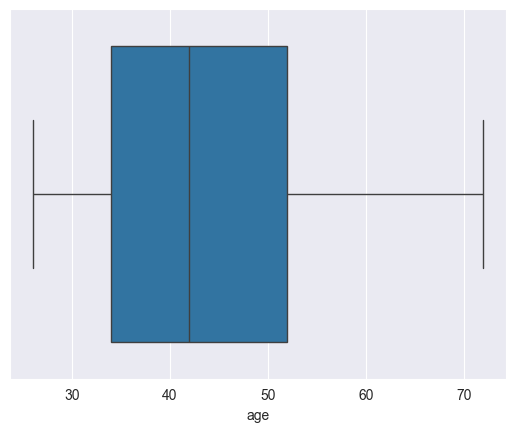

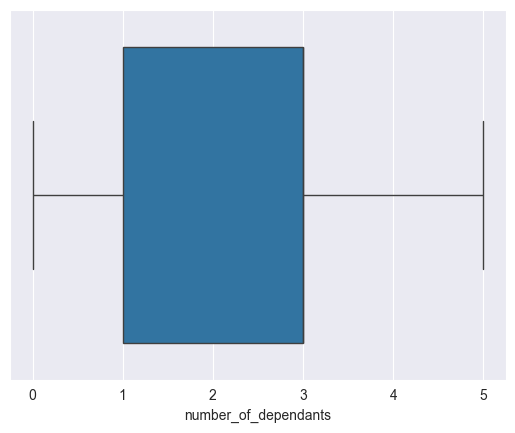

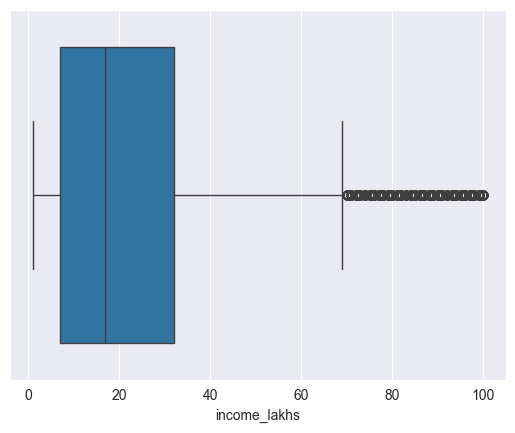

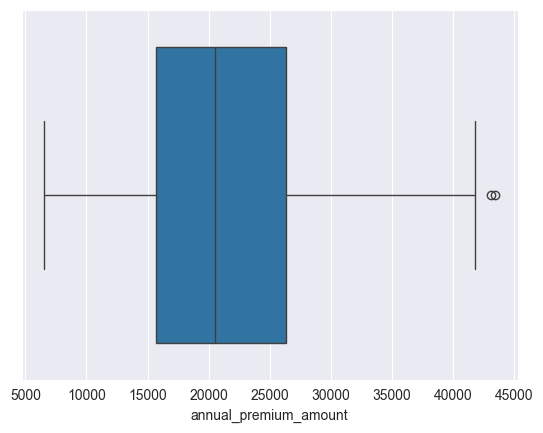

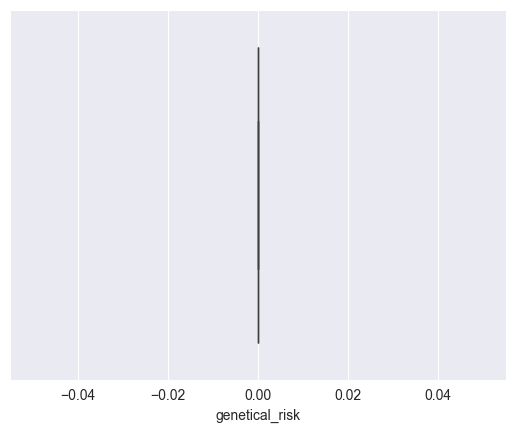

In [175]:
for col in df2.select_dtypes(['float64', 'int64']).columns:
    sns.boxplot(x=df2[col])
    plt.show()

<Axes: xlabel='income_lakhs', ylabel='Count'>

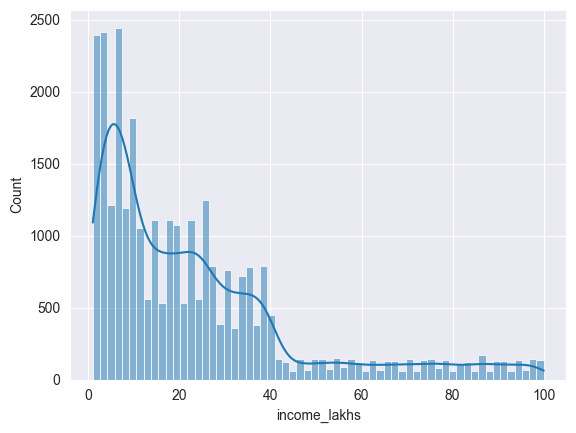

In [176]:
sns.histplot(df2['income_lakhs'], kde=True)

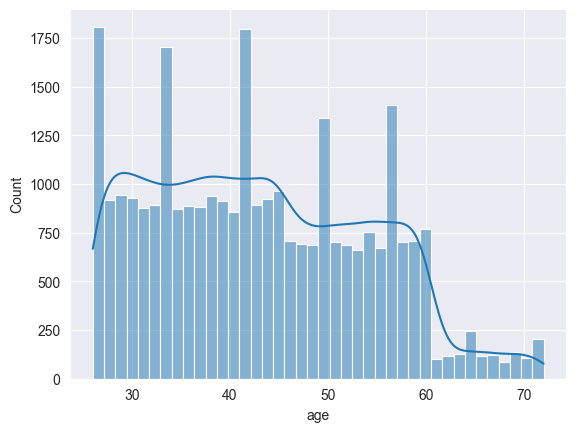

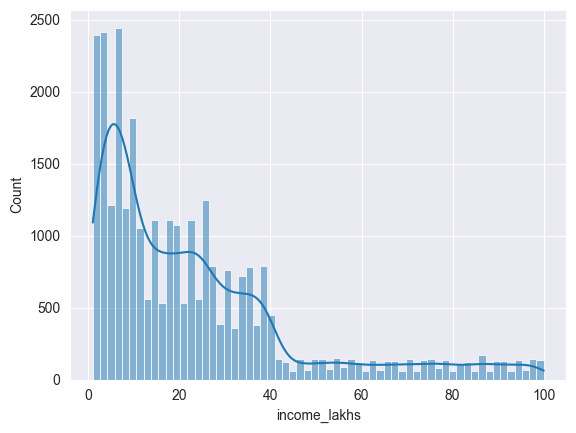

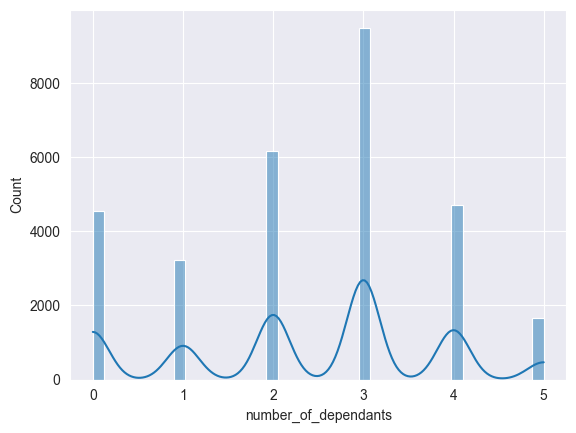

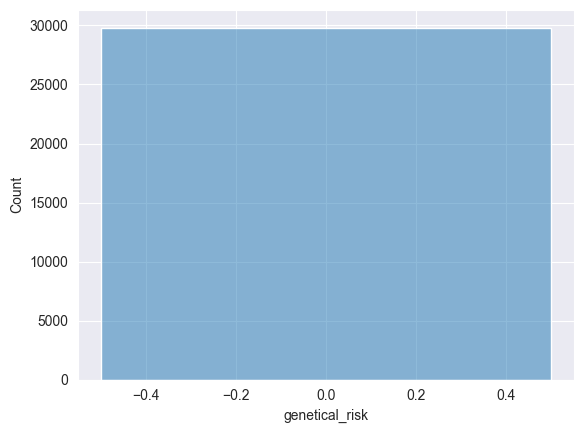

In [177]:
numerical_columns = ['age', 'income_lakhs', 'number_of_dependants', 'genetical_risk']

for col in numerical_columns:
    sns.histplot(df2[col], kde=True)
    plt.show()

In [178]:
categorical_columns = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'insurance_plan', 'medical_history', 'income_level', 'employment_status']

for col in categorical_columns:
    print(col, ':', df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
insurance_plan : ['Bronze' 'Silver' 'Gold']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']


In [179]:
df2['smoking_status'].replace({
    'Smoking=0': 'No Smoking', 'Does Not Smoker': 'No Smoking', 'Not Smoking': 'No Smoking', 'Does Not Smoke': 'No Smoking'
},inplace=True)


/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_47557/785223207.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({
/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_47557/785223207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['smoking_status'].replace({


In [180]:
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

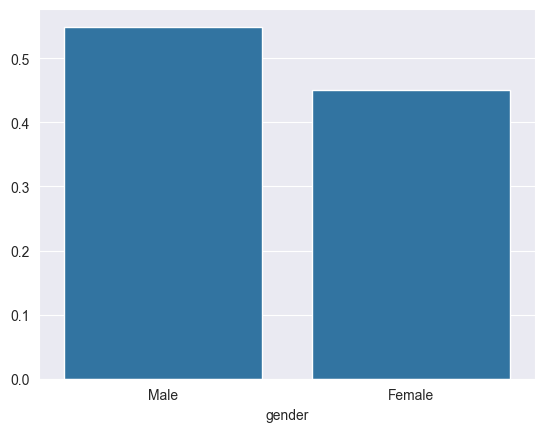

In [181]:
pct_count = df2.gender.value_counts(normalize=True)

sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

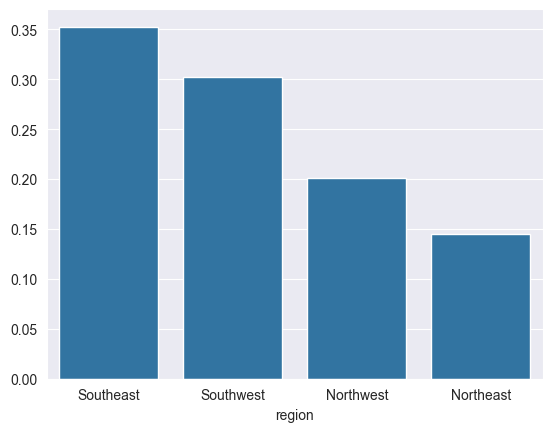

In [182]:
pct_count = df2.region.value_counts(normalize=True)

sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

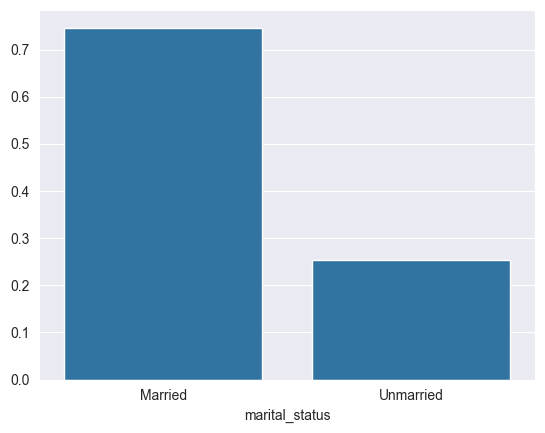

In [183]:
pct_count = df2.marital_status.value_counts(normalize=True)

sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

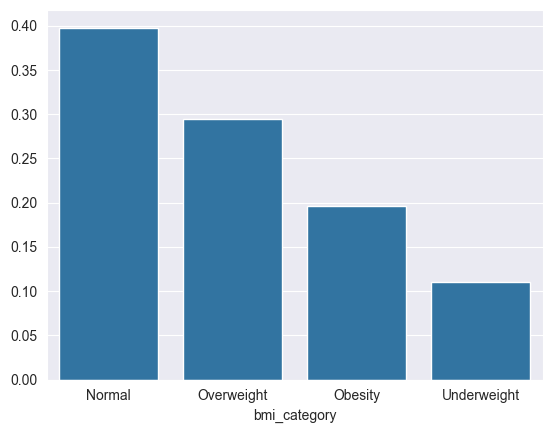

In [184]:
pct_count = df2.bmi_category.value_counts(normalize=True)

sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

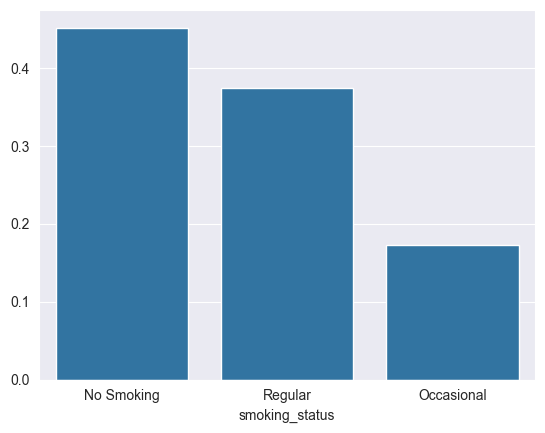

In [185]:
pct_count = df2.smoking_status.value_counts(normalize=True)

sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

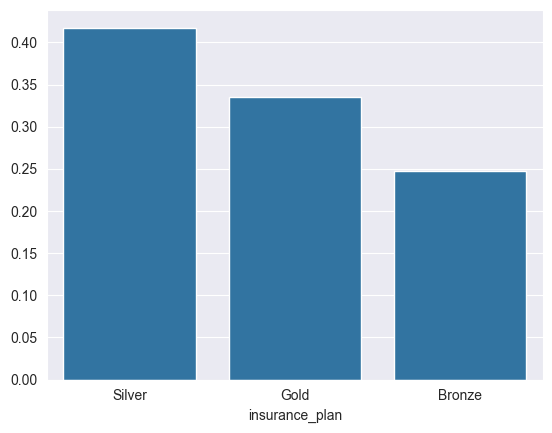

In [186]:
pct_count = df2.insurance_plan.value_counts(normalize=True)

sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

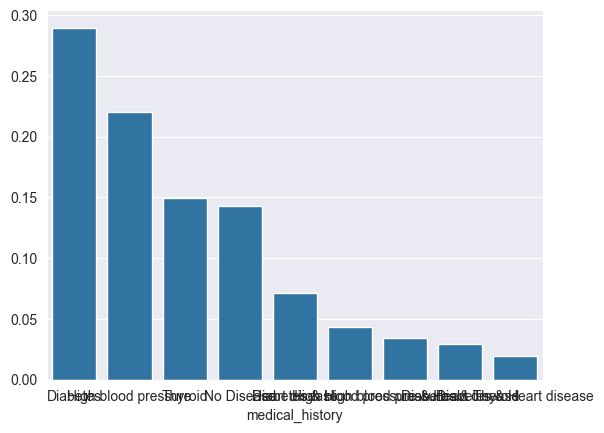

In [187]:
pct_count = df2.medical_history.value_counts(normalize=True)

sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

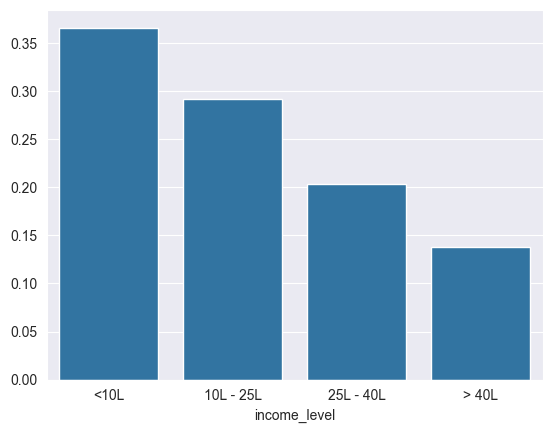

In [188]:
pct_count = df2.income_level.value_counts(normalize=True)

sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

In [189]:
cross_tab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
cross_tab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,799,3554,4354
25L - 40L,301,2631,3142
<10L,6054,527,4341
> 40L,214,3287,618


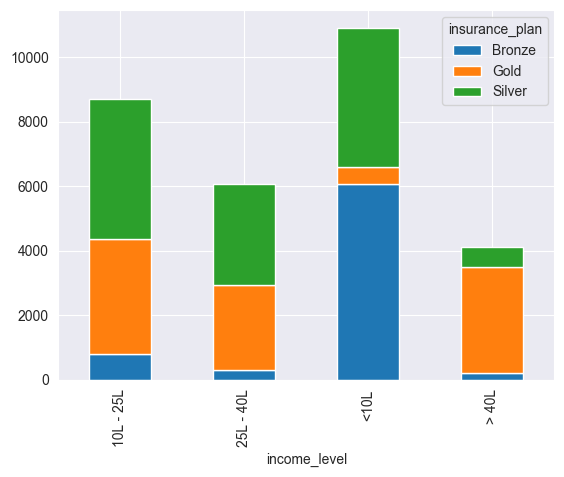

In [190]:
cross_tab.plot(kind='bar', stacked=True)
plt.show()

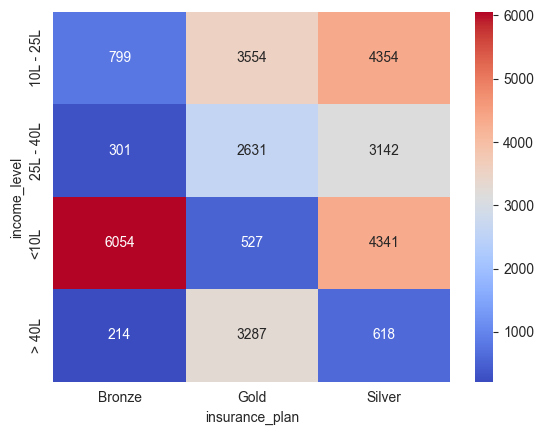

In [191]:
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.show()

In [192]:
### Feature Engineering

In [193]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [194]:
risk_score = {
    'diabetes': 6,
    'heart disease': 8,
    'high blood pressure': 6,
    'thyroid': 5,
    'no disease': 0,
    'none': 0
}

In [195]:
df2[['disease1', 'disease2']] = df2.medical_history.str.split(' & ', expand=True).apply(lambda x: x.str.lower())
df2.head()

/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_47557/3361658601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['disease1', 'disease2']] = df2.medical_history.str.split(' & ', expand=True).apply(lambda x: x.str.lower())
/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_47557/3361658601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['disease1', 'disease2']] = df2.medical_history.str.split(' & ', expand=True).apply(lambda x: x.str.lower())


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,None
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,None


In [196]:
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)

/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_47557/3883420476.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_47557/3883420476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['disease1'].fillna('none', inplace=True)

In [197]:
df2['total_risk_score'] = 0

/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_47557/330273375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_risk_score'] = 0


In [198]:
for col in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[col].map(risk_score)

/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_47557/739776020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_risk_score'] += df2[col].map(risk_score)
/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_47557/739776020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_risk_score'] += df2[col].map(risk_score)


In [199]:
max_score = df2.total_risk_score.max()
min_score = df2.total_risk_score.min()

df2['normalized_risk_score'] = (df2.total_risk_score - min_score) / (max_score - min_score)
df2.head()

/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_47557/1630640237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['normalized_risk_score'] = (df2.total_risk_score - min_score) / (max_score - min_score)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,none,6,0.428571


In [200]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [201]:
df2['insurance_plan'] = df2['insurance_plan'].map({
    'Bronze': 1,
    'Silver': 2,
    'Gold': 3
})
df2.insurance_plan.unique()

/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_47557/2280062988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['insurance_plan'] = df2['insurance_plan'].map({


array([1, 2, 3])

In [202]:
df2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [203]:
df2['income_level'] = df2['income_level'].map({
    '<10L': 1,
    '10L - 25L': 2,
    '25L - 40L': 3,
    '> 40L': 4
})
df2.income_level.unique()

/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_47557/3200946803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['income_level'] = df2['income_level'].map({


array([1, 2, 4, 3])

In [204]:
normalize_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']

df3 = pd.get_dummies(df2, columns=normalize_cols, drop_first=True, dtype=int)

df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,0,diabetes,none,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,0,diabetes,none,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,0,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,0,no disease,none,...,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,Diabetes,1,15610,0,diabetes,none,...,0,0,0,1,0,0,1,0,0,1


In [205]:
df4 = df3.drop(columns=['medical_history', 'disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


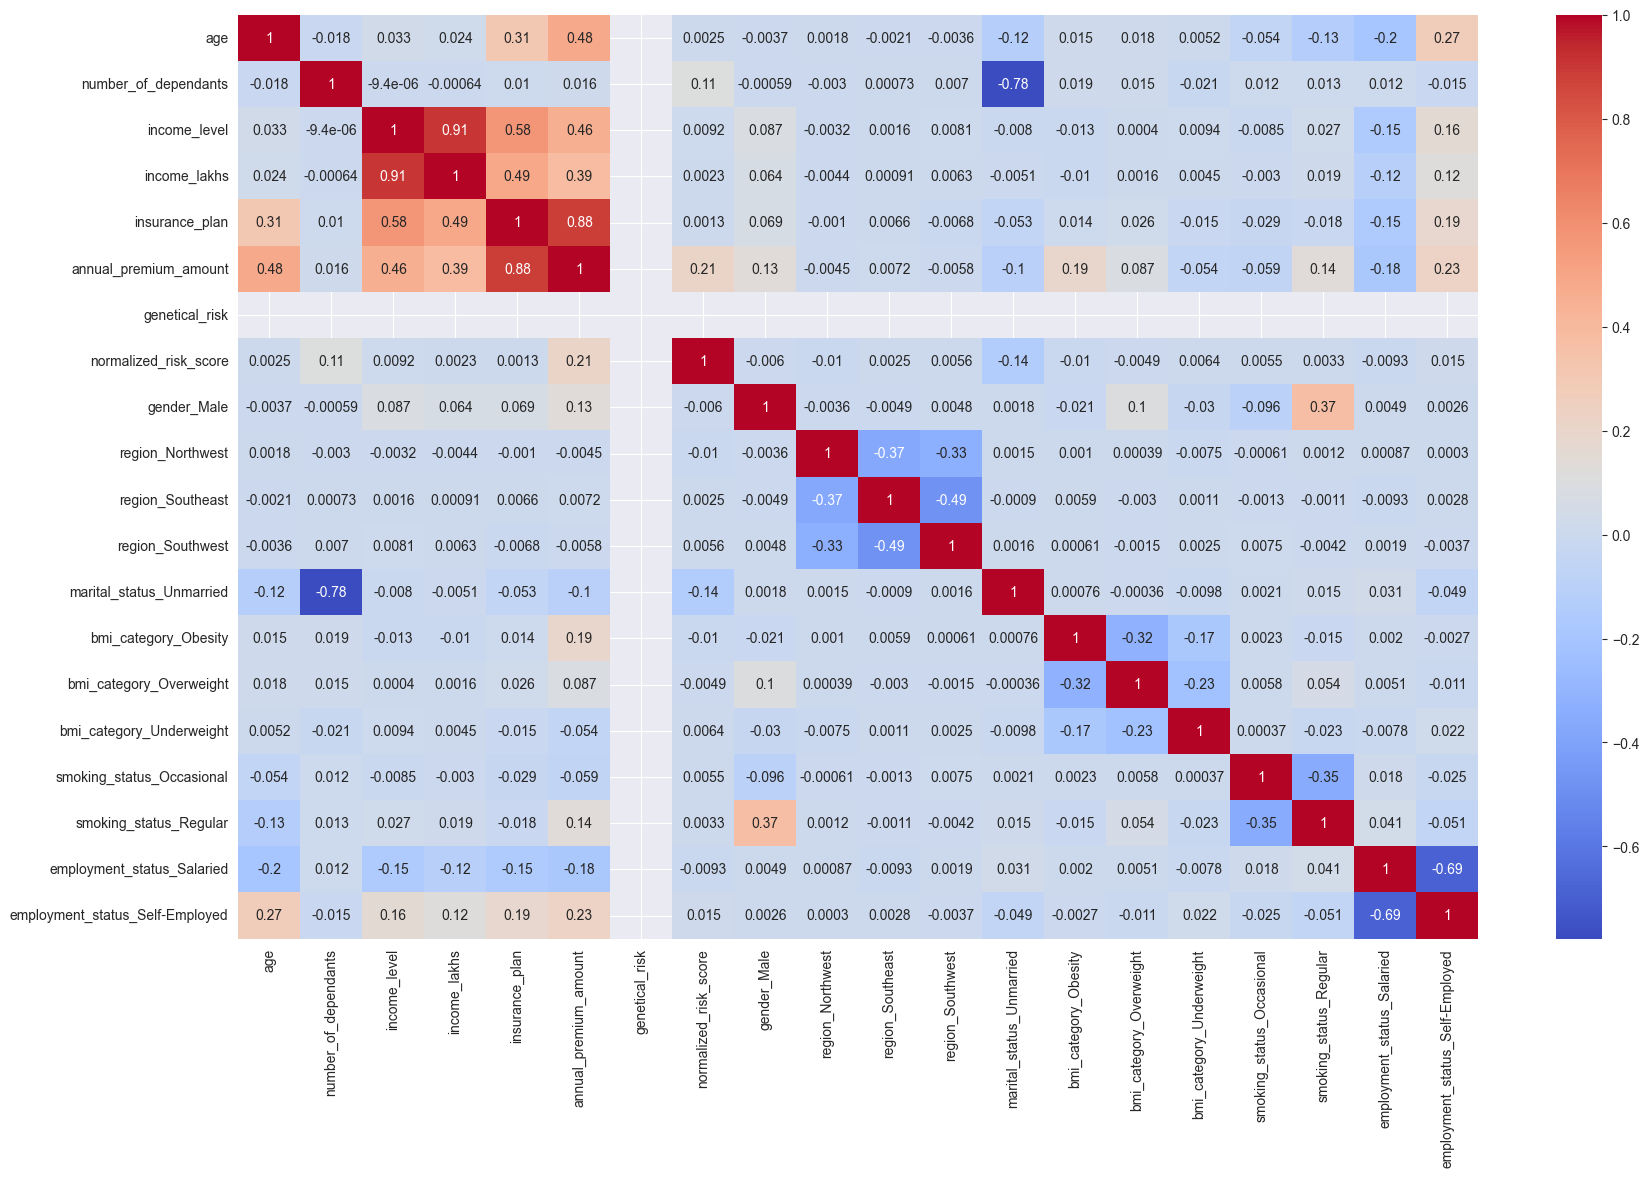

In [206]:
cm = df4.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

In [207]:
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [208]:
X = df4.drop(columns='annual_premium_amount')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

col_to_scale = ['age', 'number_of_dependants', 'income_level' ,'income_lakhs', 'insurance_plan', 'genetical_risk']
scaler = MinMaxScaler()

X[col_to_scale] = scaler.fit_transform(X[col_to_scale])
X.describe()


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.0,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.0,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [209]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Column'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [210]:
calculate_vif(X)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,genetical_risk,NaN
6,normalized_risk_score,3.810619
7,gender_Male,2.599098
8,region_Northwest,2.123965
9,region_Southeast,2.980842


In [211]:
X.drop(columns=['income_level'], axis='columns')
calculate_vif(X)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,genetical_risk,NaN
6,normalized_risk_score,3.810619
7,gender_Male,2.599098
8,region_Northwest,2.123965
9,region_Southeast,2.980842


In [212]:
X_reduced = X.drop('income_level', axis='columns')

In [213]:
### Model Training

In [214]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=10)

X_train.shape, X_test.shape

((20875, 18), (8947, 18))

In [215]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

model_lr.score(X_test, y_test), model_lr.score(X_train, y_train)

(0.9538448451629948, 0.9534163989489616)

In [216]:
import numpy as np

np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([ 7016.239328, -1311.764702,  -708.193369, 14835.988208,
          -0.      ,  6053.624123,    37.558269,   -55.250872,
         -19.622543,   -22.289676,  -700.3202  ,  3926.812706,
        1979.456047,   612.866236,   837.395101,  2800.661843,
         -45.491367,   243.078421])

In [217]:
model_lr.intercept_

np.float64(5935.981289344607)

In [218]:
feature_importances = model_lr.coef_

coef_df = pd.DataFrame(feature_importances, columns=['Coefficients'], index=X_train.columns)
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

coef_df

,Coefficients
number_of_dependants,-1.311765e+03
income_lakhs,-7.081934e+02
marital_status_Unmarried,-7.003202e+02
region_Northwest,-5.525087e+01
employment_status_Salaried,-4.549137e+01
region_Southwest,-2.228968e+01
region_Southeast,-1.962254e+01
genetical_risk,-2.273737e-13
gender_Male,3.755827e+01
employment_status_Self-Employed,2.430784e+02


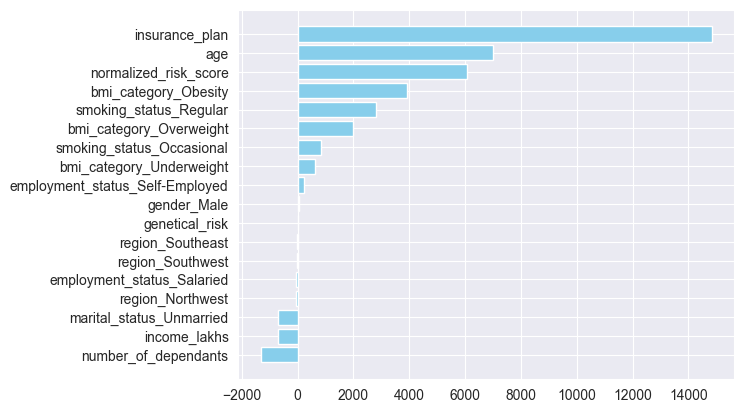

In [219]:
plt.barh(coef_df.index, coef_df.Coefficients, color='skyblue')
plt.show()

In [220]:
from sklearn.linear_model import Lasso, Ridge

model_rg = Ridge()
model_rg.fit(X_train, y_train)

model_rg.score(X_test, y_test), model_rg.score(X_train, y_train)

(0.9538456995663842, 0.9534162332209687)

In [221]:
model_ls = Lasso()
model_ls.fit(X_train, y_train)

model_ls.score(X_test, y_test), model_ls.score(X_train, y_train)

(0.9538410443658304, 0.9534109910848642)

In [222]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

model_xgb.score(X_test, y_test), model_xgb.score(X_train, y_train)

(0.9979538321495056, 0.9986370801925659)

In [78]:
# from sklearn.ensemble import RandomForestRegressor
#
# model_rf = RandomForestRegressor()
# model_rf.fit(X_train, y_train)
#
# model_rf.score(X_test, y_test), model_rf.score(X_train, y_train)

(0.9976892708118913, 0.9996763286002391)

In [223]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'max_depth': [3,4,5],
    'learning_rate': [0.01, 0.1, 0.2]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model_xgb, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

grid_search.best_score_, grid_search.best_estimator_, grid_search.best_params_

(np.float64(0.9980716705322266),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50})

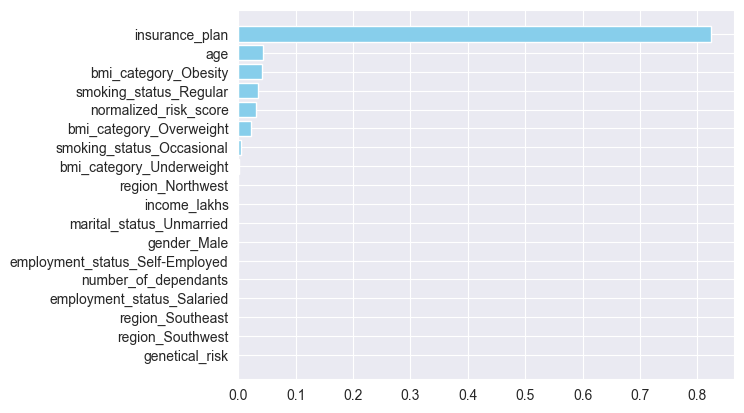

In [224]:
feature_importances = grid_search.best_estimator_.feature_importances_

coef_df = pd.DataFrame(feature_importances, columns=['Coefficients'], index=X_train.columns)
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.barh(coef_df.index, coef_df.Coefficients, color='skyblue')
plt.show()

In [86]:
### Model Evaluation | Error Analysis

In [225]:
best_model = grid_search.best_estimator_

In [227]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = residuals*100 / y_test

result_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct
})

result_df

,actual,predicted,diff,diff_pct
19713,26895,26553.378906,-341.621094,-1.270203
14750,22734,23020.988281,286.988281,1.262375
19932,21198,21575.480469,377.480469,1.780736
29643,9100,9073.785156,-26.214844,-0.288075
17076,26434,26564.386719,130.386719,0.493254
...,...,...,...,...
3387,9291,9070.371094,-220.628906,-2.374652
7858,18261,18072.908203,-188.091797,-1.030019
9744,12419,12092.733398,-326.266602,-2.627157
4849,29735,29596.517578,-138.482422,-0.465722


<Axes: xlabel='diff_pct', ylabel='Count'>

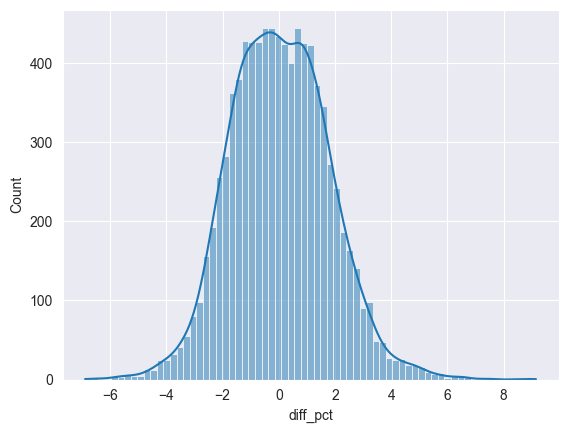

In [89]:
sns.histplot(result_df['diff_pct'], kde=True)

In [228]:
import numpy as np

extreme_error_threshold = 6
extreme_result_df = result_df[np.abs(result_df.diff_pct) > extreme_error_threshold]

extreme_result_df.shape

(22, 4)

In [229]:
extreme_error_pct = extreme_result_df.shape[0] / result_df.shape[0] * 100
extreme_error_pct

0.24589247792556165

In [230]:
extreme_errors_df = X_test.loc[extreme_result_df.index]
extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
27065,0.086957,0.4,0.010101,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,1,0,0,1
27518,0.304348,0.6,0.080808,0.0,0.0,0.357143,1,1,0,0,0,0,0,0,0,0,0,1
6093,0.543478,0.6,0.050505,0.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,0,1
7547,0.347826,0.2,0.080808,0.0,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,1,0
15211,0.543478,0.0,0.222222,0.0,0.0,0.000000,1,1,0,0,1,0,0,1,0,0,0,1


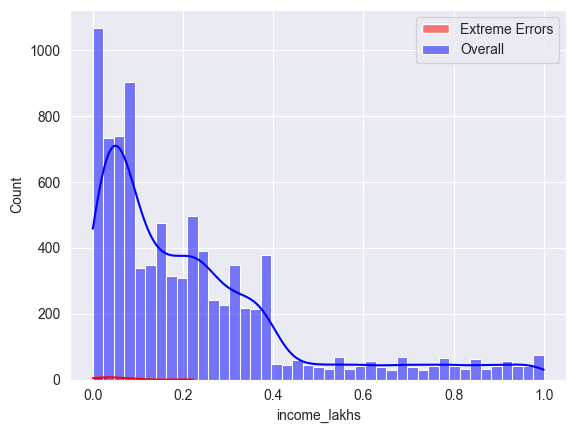

In [232]:
sns.histplot(extreme_errors_df.income_lakhs, kde=True, label='Extreme Errors', color='red')
sns.histplot(X_test.income_lakhs, kde=True, label='Overall', color='blue')
plt.legend()
plt.show()

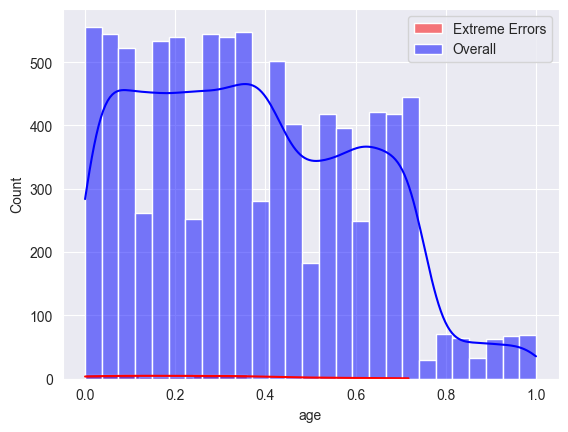

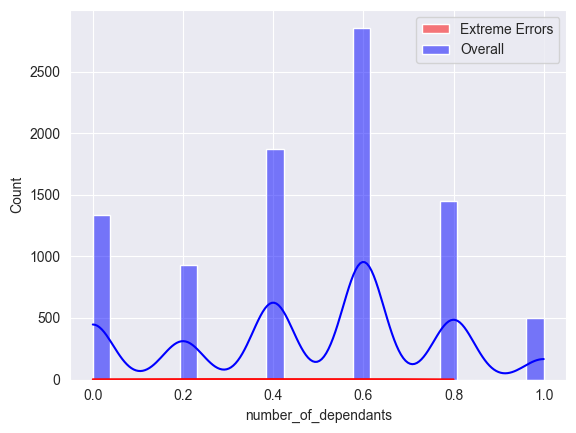

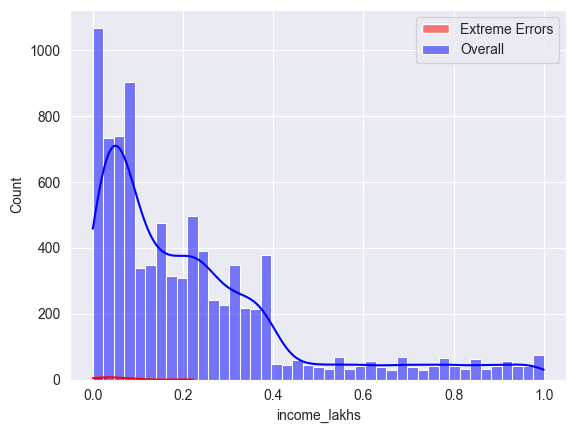

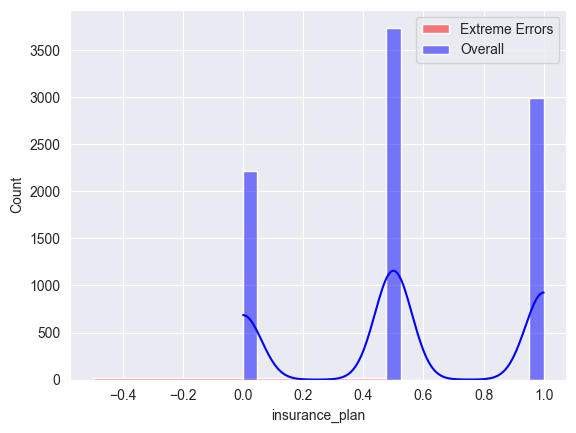

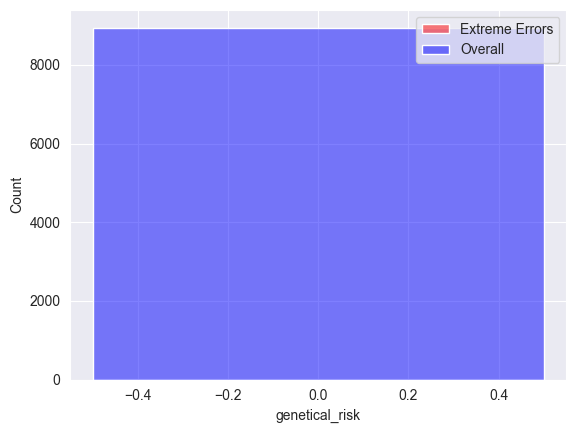

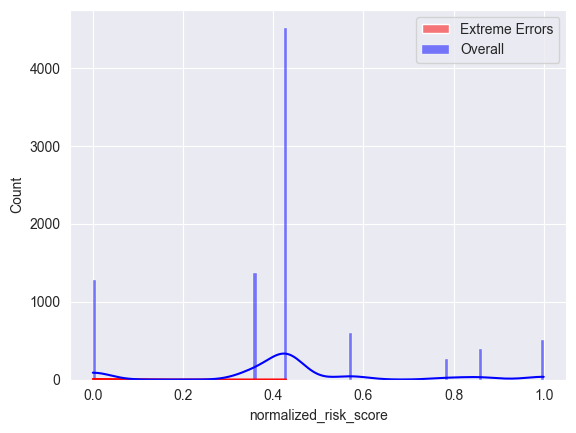

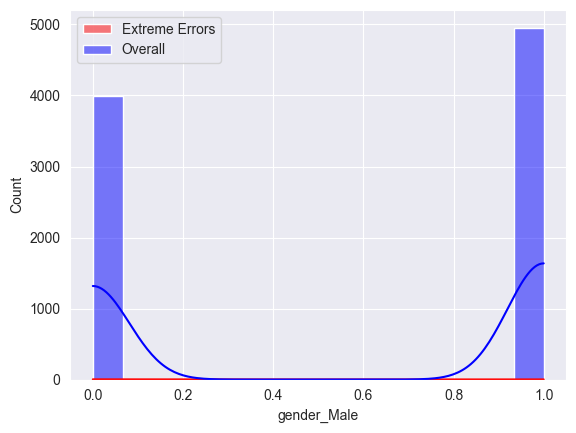

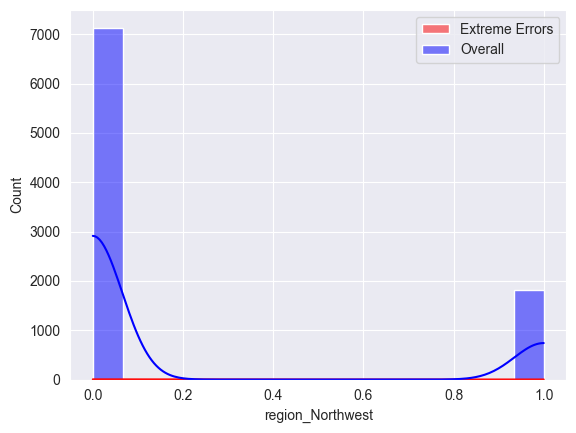

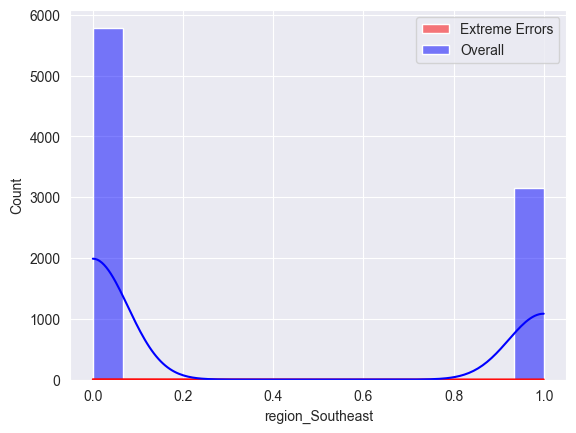

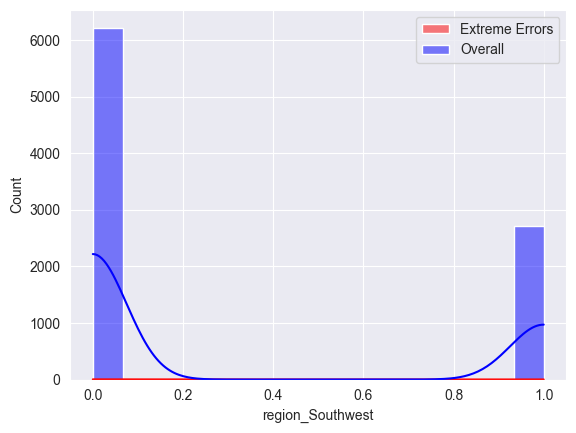

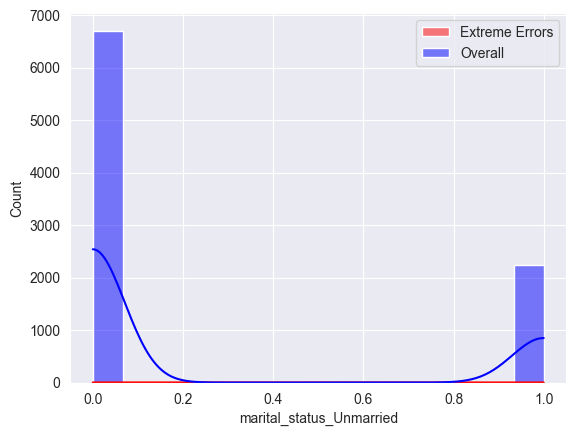

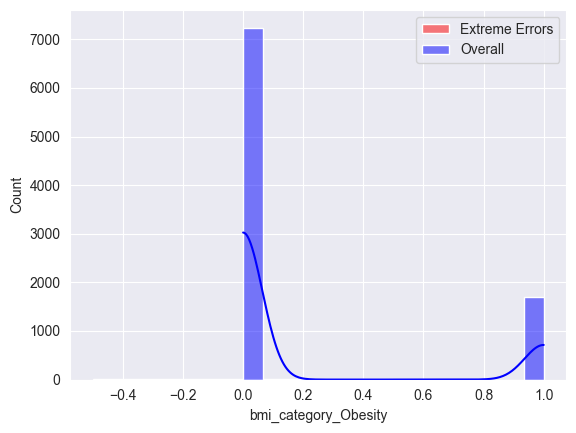

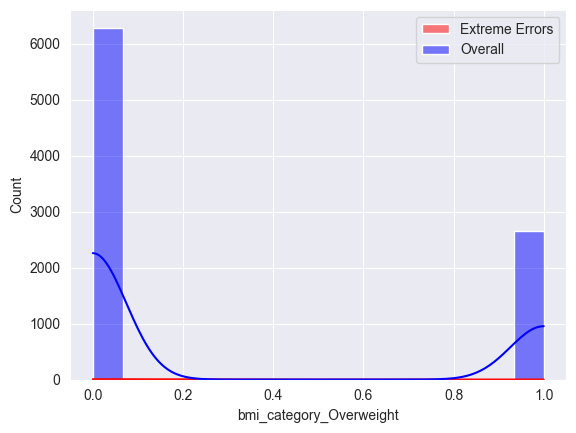

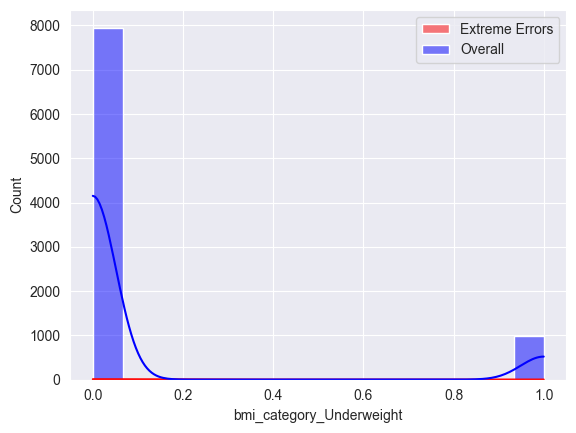

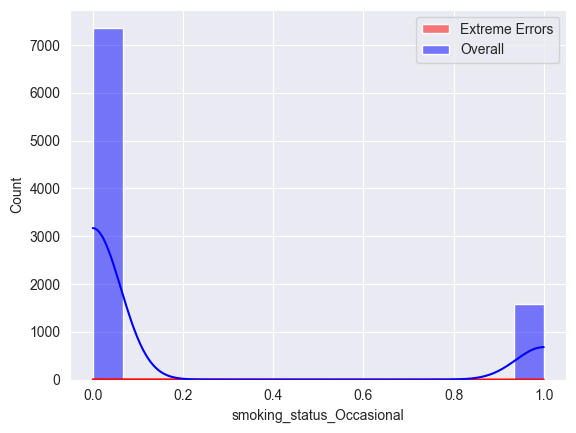

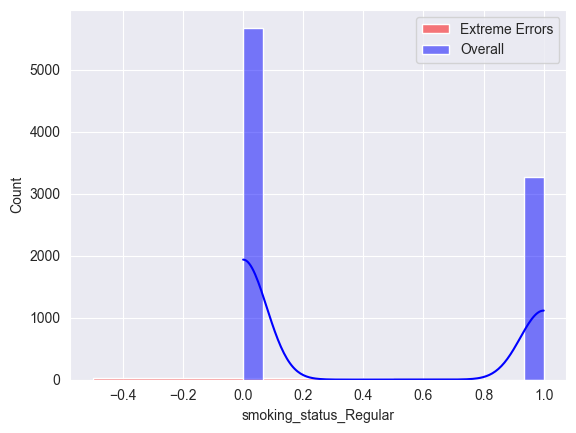

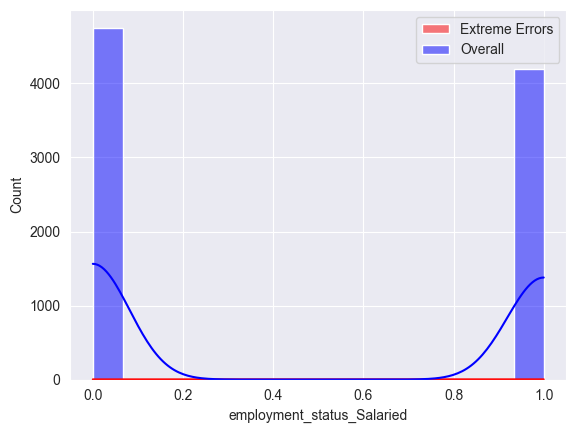

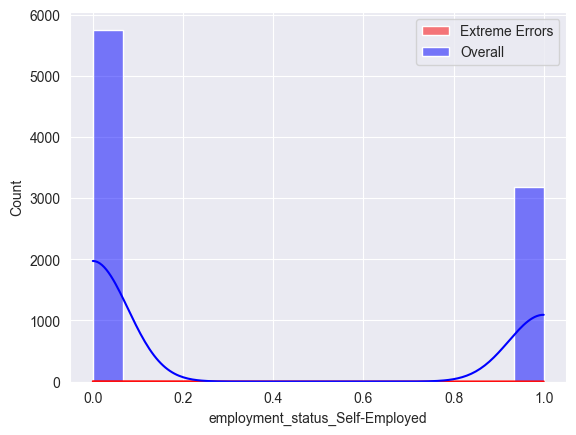

In [233]:
for feature in X_test.columns:
    sns.histplot(extreme_errors_df[feature], kde=True, label='Extreme Errors', color='red')
    sns.histplot(X_test[feature], kde=True, label='Overall', color='blue', alpha=0.5)
    plt.legend()
    plt.show()

In [234]:
col_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan',
 'genetical_risk']

In [97]:
from joblib import dump

dump(best_model, "./artifacts/model_rest.joblib")

['./artifacts/model_rest.joblib']

In [98]:
scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scale': col_to_scale
}
dump(scaler_with_cols, "./artifacts/scaler_rest.joblib")

['./artifacts/scaler_rest.joblib']